# NoShow Appointments by Age, Gender and other factors

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

**Conducted by Andy Fuchs**

<a id='intro'></a>
## Introduction

For the "Investigate a dataset" project I have chosen the no-show data from kaggle.  
It sounded interesting to me because I was not aware of that topic.  
The no-shows may cause a lot of costs for our healthcare system.   
Moreover we can get some information how to deal with that in the future. 


What is interesting to me in detail?


Question 1
**Is there a difference between male and female patients?**


Question 2
**Can we see trends in the age structure of the patients?**


Question 3
**How are the no-shows influenced by other patterns?**

In [48]:
# Use this cell to set up import statements for all of the packages that you
# plan to use.
# This is my "standartized" import of libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import statistics
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
# inline with the notebook. 
# OK, done.
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Prepare data for further analysis

In [49]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
# Filename 'KaggleV2-May-2016.csv'
# I have chosen "df" for the dataframe as:
# - it is standard (will help when copying code from documentations/tutorials)
# - we only have one dataset (no distinction by dataframe names needed)

file = 'KaggleV2-May-2016.csv'
df = pd.read_csv(file)

### Data Cleaning (Replace this with more specific notes!)

In [50]:
# 1st step: Get overview over structure and data types. Do we have empty fields?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [51]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Ok so far. 110527 entries in all data fields.
1st look: Column names seem strange (Id vs. ID, Hipertension, Handcap etc..)**

In [52]:
# Correct Column names
df.rename(columns = {'Hipertension':'Hypertension', 'PatientId': 'PatientID','Handcap': 'Handicap','No-show': 'NoShow'}, inplace = True)

In [53]:
# Lets have a second look onto the first lines of dataframe 
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [54]:
# Do we have any empty fields?
df.isnull().sum()

PatientID         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
NoShow            0
dtype: int64

In [55]:
# Check whether data is in between realistic ranges
df.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [56]:
# Get some more details on age to identify potential outliers
print(sorted(df['Age'].unique()))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [57]:
# Clean up data 
df.Gender = df.Gender.astype('category') 
df = df[df.Age > -1]
df = df[df.Age < 100]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


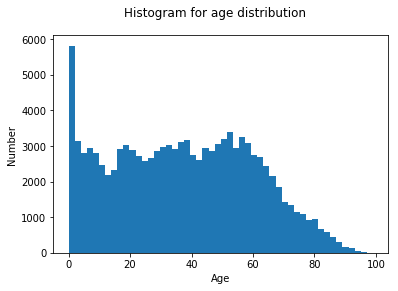

In [58]:
# Checking Clean up data 
print(sorted(df['Age'].unique()))
plt.suptitle('Histogram for age distribution')
plt.hist(df.Age, bins=50)
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()

**We can see that the age structure may be realistic (to get an estimation about data quality).   
Seems to be fine.**

<a id='eda'></a>
## Exploratory Data Analysis

> **Intro**: Above I checked existing data and did some cleaning up for my purposes.  
Now I start to answer my questions:

###  Is there a difference between male and female patients?  

At first I will define a function to calculate ratios 

In [59]:
# Ratio calculation 
# inspired by Somrik Banerjee,https://www.kaggle.com/somrikbanerjee/predicting-show-up-no-show/notebook [In 10]

def RatioStatus(dataset, group_by):
    ratio_df = pd.crosstab(index = dataset[group_by], columns = dataset.NoShow).reset_index()
    ratio_df['NoShowRatio'] = ratio_df['Yes'] / (ratio_df['Yes'] + ratio_df['No'])
    return ratio_df[[group_by, 'NoShowRatio']]


For getting an overwiew over the datset I take the hist()-function. It will show the absolute values in the dataset.

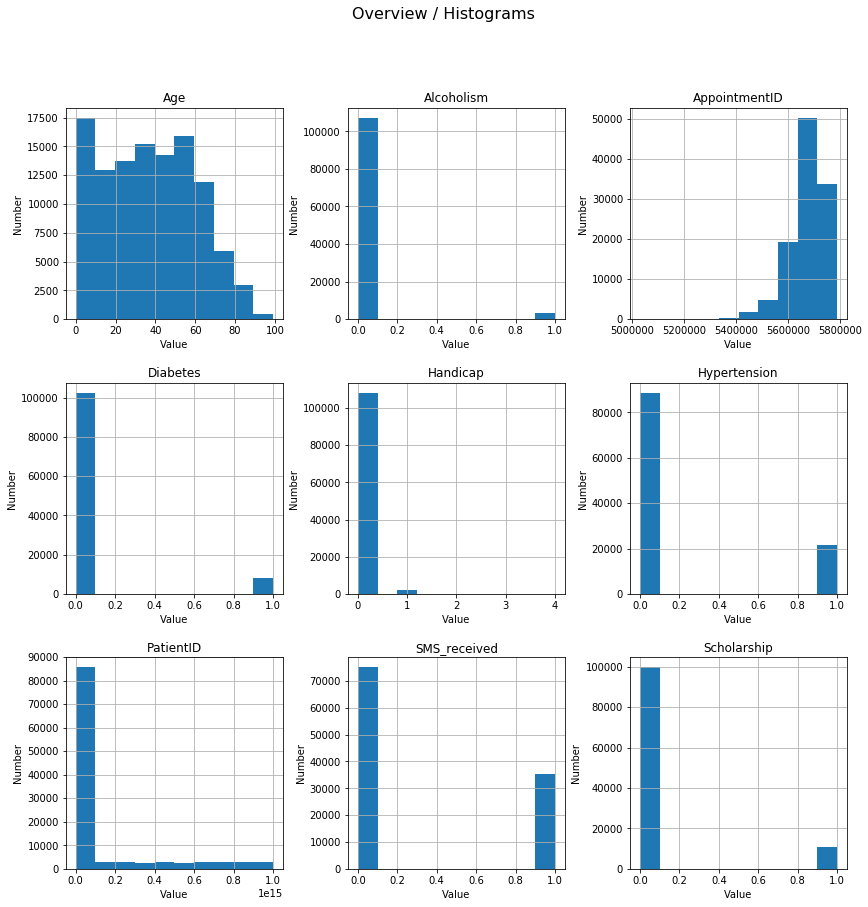

In [60]:
axarr = df.hist(figsize=(14,14))
plt.suptitle('Overview / Histograms', fontsize=16)
for ax in axarr.flatten():
    ax.set_xlabel("Value")
    ax.set_ylabel("Number")

plt.show()


In [61]:
print(RatioStatus(df, 'Gender'))

NoShow Gender  NoShowRatio
0           F     0.203132
1           M     0.199690


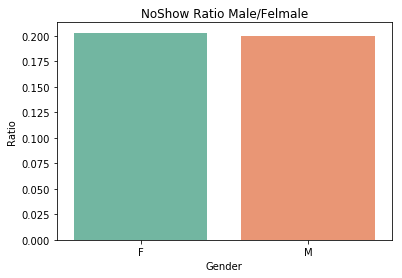

In [62]:
# Let's see whats the ratio between female and male NoShows
# Some rework - include statistics (not only visualisation)

sns.barplot(x="Gender", y="NoShowRatio", data=RatioStatus(df, 'Gender'), palette='Set2')
plt.title('NoShow Ratio Male/Felmale')
plt.ylabel('Ratio')
plt.show()

**In this graph, we really can not see a difference between female and male ShowUps.  
My idea is to change the visualisation in order to scale the ratio values**  
  
Let's take the factorplot function - now we will see the relevant part of our ratio data:

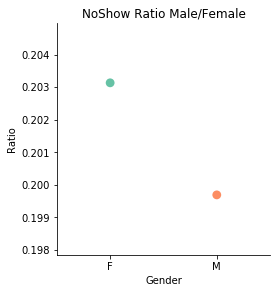

In [63]:
#Second try to get a nice visualization
# Also in here - include statistics

sns.factorplot(x="Gender", y="NoShowRatio", data=RatioStatus(df, 'Gender'), palette='Set2')
plt.title('NoShow Ratio Male/Female')
plt.ylabel('Ratio')
plt.show()

** We can see that the women's NoShowRatio (0.203132) is a little bit higher than men's (0.199690). The difference is not very sicnificant. So we may ask whether the gender will play an important role for future analysis.**    
  
  
###  Can we see trends in the age structure of the patients?

We choose the jointplot - a scatterplot with additional histograms.  
In this case for the ratio and the age of patients.

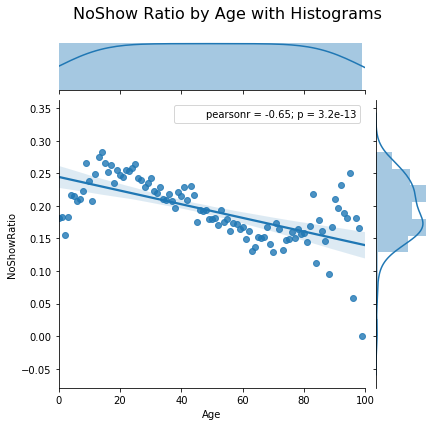

In [64]:
sns.jointplot("Age", "NoShowRatio", data = RatioStatus(df, 'Age'), kind="reg")
plt.suptitle('NoShow Ratio by Age with Histograms', fontsize=16)
plt.xlim(0,100)
plt.subplots_adjust(top=0.9)
plt.show()

** For the age we can see that NoShows happen more often for younger patients.  
Most accurate are patients between 60 and 80 years.
Generally the trend shows: The older, the less the NoShows**  


In addition to that, I would like to know whether the gender plays a role in the age structure.  
We will check the gender specific numers of visits and ShowUps:

In [65]:
#Setup a visualisation which shows age distribution by gender

#Dataset0
df_age0 = pd.DataFrame()
df_age0['Age'] = range(100)
male0 = df_age0.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'M')]))
female0 = df_age0.Age.apply(lambda x: len(df[(df.Age == x) & (df.Gender == 'F')]))


#Dataset1
df1 = df[df.NoShow == 'No']
df_age = pd.DataFrame()
df_age['Age'] = range(100)
male1 = df_age.Age.apply(lambda x: len(df1[(df1.Age == x) & (df1.Gender == 'M')]))
female1 = df_age.Age.apply(lambda x: len(df1[(df1.Age == x) & (df1.Gender == 'F')]))

#Dataset 2
df2 = df[df.NoShow == 'Yes']
df_age2 = pd.DataFrame()
df_age2['Age'] = range(100)
male2 = df_age2.Age.apply(lambda x: len(df2[(df2.Age == x) & (df2.Gender == 'M')]))
female2 = df_age2.Age.apply(lambda x: len(df2[(df2.Age == x) & (df2.Gender == 'F')]))

#Dataset3
df3 = df[df.NoShow == 'Yes']
df_rat = pd.DataFrame()
df_rat['Age'] = range(100)
rat = df_rat.Age.apply(lambda x: len(df3[(df3.Age == x) & (df3.Gender == 'M')])) / df_rat.Age.apply(lambda x: len(df3[(df2.Age == x) & (df3.Gender == 'F')]))

#Print total amounts of visits
print("Total number of visits:")
print("Female: ", female0.sum())
print("Male: ", male0.sum())
print()
print("Total number of ShowUps:")
print("Female: ", female1.sum())
print("Male: ", male1.sum())

Total number of visits:
Female:  71830
Male:  38685

Total number of ShowUps:
Female:  57239
Male:  30960


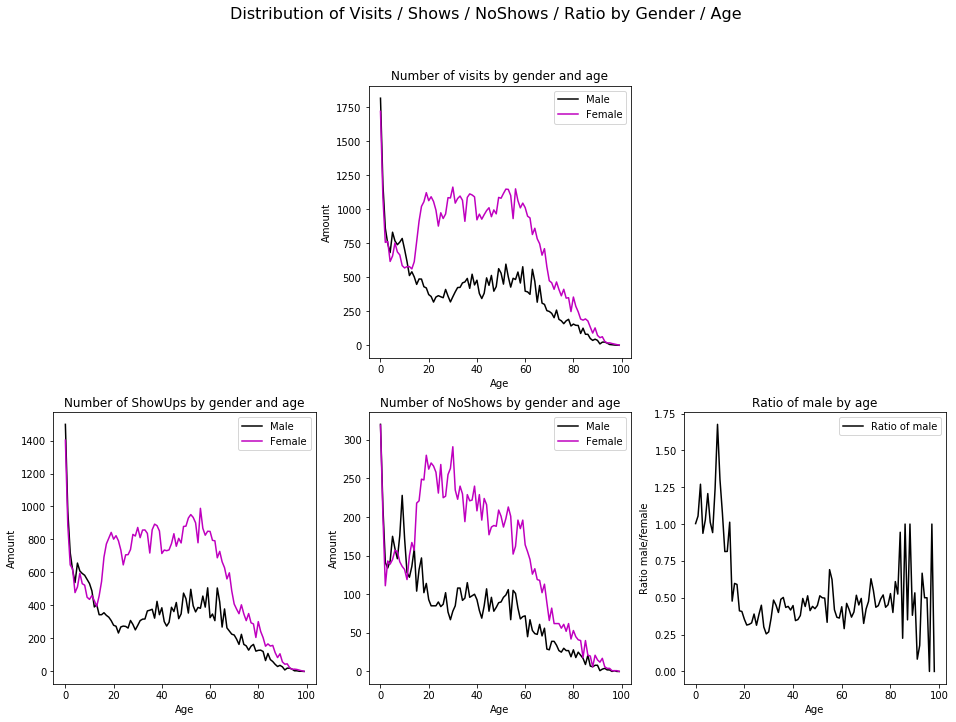

In [66]:
#Now we plot the gathered data
# Setup Mainplot
plt.figure(figsize=(16,11))
plt.suptitle('Distribution of Visits / Shows / NoShows / Ratio by Gender / Age', fontsize=16)
#Subplot0
plt.subplot(232)
plt.plot(range(100),male0, 'k')
plt.plot(range(100),female0, color = 'm')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Number of visits by gender and age')
plt.legend(['Male','Female'])

# Subplot1
plt.subplot(234)
plt.plot(range(100),male1, 'k')
plt.plot(range(100),female1, color = 'm')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Number of ShowUps by gender and age')
plt.legend(['Male','Female'])


#Subplot2
plt.subplot(235)
plt.plot(range(100),male2, 'k')
plt.plot(range(100),female2, color = 'm')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Number of NoShows by gender and age')
plt.legend(['Male','Female'])

#Subplot3
plt.subplot(236)
plt.plot(range(100),rat, 'k')
plt.xlabel('Age')
plt.ylabel('Ratio male/female')
plt.title('Ratio of male by age')
plt.legend(['Ratio of male'])

#Finalize
plt.show()


** As we can see, there are more women at the doctors than men by absolute figures.  
As we have seen that the general ShowUp ratio for male and female patientsis quite similar,  
we can expect that women have a higher absolute number of ShowUps.  
By implication a higher number of women must have NoShows at the doctors, too.  
The ratio graph shows that the fraction of men (all visits) is less than womens, which proves the absolute numbers.**  
The numer of female visits is growing up in the age of about 15 years!

### How are the no-shows influenced by other patterns?  
  
For this purpose we try to visualize more than one influencing factor in one plot.  
We take subplots to have a clear distinction between each influencing factor.

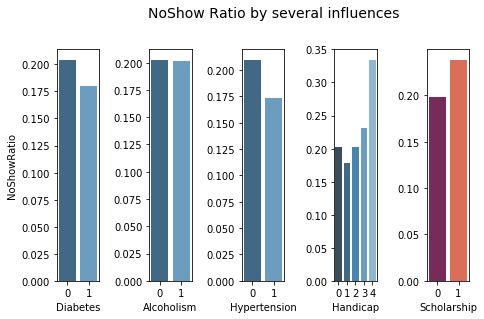

In [67]:
plt.figure(figsize=(8,4))

plt.plot(1)

plt.subplot(1,6,1)
sns.barplot(x = 'Diabetes', y = 'NoShowRatio',  data = RatioStatus(df, 'Diabetes'), palette="Blues_d")
plt.xlabel('Diabetes')
plt.ylabel('NoShowRatio')

plt.subplot(1,6,2)
sns.barplot(x = 'Alcoholism', y = 'NoShowRatio',  data = RatioStatus(df, 'Alcoholism'), palette="Blues_d")
plt.xlabel('Alcoholism')
plt.ylabel('')

plt.subplot(1,6,3)
sns.barplot(x = 'Hypertension', y = 'NoShowRatio',  data = RatioStatus(df, 'Hypertension'), palette="Blues_d")
plt.xlabel('Hypertension')
plt.ylabel('')

plt.text(1, 0.25, 'NoShow Ratio by several influences', horizontalalignment='center', fontsize=14)

plt.subplot(1,6,4)
sns.barplot(x = 'Handicap', y = 'NoShowRatio',  data = RatioStatus(df, 'Handicap'), palette="Blues_d")
plt.xlabel('Handicap')
plt.ylabel('')

plt.subplot(1,6,5)
sns.barplot(x = 'Scholarship', y = 'NoShowRatio',  data = RatioStatus(df, 'Scholarship'), palette="rocket")
plt.xlabel('Scholarship')
plt.ylabel('')

plt.tight_layout()

plt.show()

** We can see that NoShows differ for serveral influencing factors.** 
- Diabetes and Hypertension patients have less fraction for NoShows  
- Alcoholic disease seems to make no difference in ShowingUp at the doctors.
- In general, handicapped persons show up more often, than the less handicapped.
- Participating in a Scholarship program will lead to higher NoShow ratio.

<a id='conclusions'></a>
## Conclusions

Coming back on the questions stated in the beginning of this notebook.  
Following conclusions can be drawn:

**Is there a difference between male and female patients?**

We can say that there is not a big difference in the NoShow ratio between women and men.     
Women show up more often at the doctors that men.  
So the absolute number of NoShow for female patients is higher.   
*==> NoShow ratio is not significantly being influenced by gender.* 

**Can we see trends in the age structure of the patients?**
Concerning the NoShow ratio for the age we can see a trend. It shows that younger people have a higher NoShow ratio than older people. In the first five years of life the NoShow ratio is quite low, but lowest in the age of 60 - 80 years. Depending on gender and age the absolute number of visits varies strongly.  
*==> We can see that particular phases in life affect both the NoShow ratio and the absolute number of visits. The absolute number of visits differs by gender.*

**How are the no-shows influenced by other patterns?**
Serveral disease patterns will influence NoShow ratio. 
Example: We should expect that alcoholism is a strong factor which influences NoShows.  
It is proven not to be true. Diseases like diabetes and hypertension lead to a lower NoShow ratio.  
*==> NoShows are affected by several factors, both diseases / handicaps and social state.* 


### Limitations  

Serveral factors are limiting the dataset:  
* The dataset is a sample which does not represent the population
* Some data is irrelevant for analysis (e.g. AppointmentID). 
* Data is missing: 
  * Only a few diseases are in the dataset. To perform an exact analysis about relationship between NoShows and diseases, all kinds of diseases should be in the dataset. 
  * Women visit doctors more often beginning in the age of about 15 years. For analysing why, we would need data about medical treatment or at least which kind of doctor (gynecologist) has been visited.
  * Social state / income: Related to the given scholarship information we do not have exact information on social state. 



In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0